
Q1) In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [109]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [110]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 8       0       9       8       6       

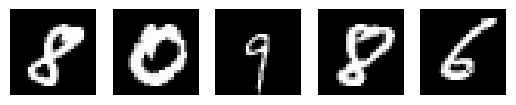

In [111]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [112]:
# Flatten the images into 1-d vectors
print(len(y_train), len(x_train))
x_train_flatten = x_train.reshape(-1, 28*28)                                    # flatten the images of training set
x_test_flatten = x_test.reshape(-1, 28*28)                                     # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 100                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_t = y_train[n_validation:]
print(len(y_train), len(x_train_flatten))



60000 60000
60000 59900


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [113]:
model = keras.models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <Sequential name=sequential_13, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [114]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 6             # set number of epochs
batch_size = 32          # you can tweak with these parametrs
print(len(y_t), len(x_train_flatten))
history = model.fit(x_train_flatten, y_t, batch_size=batch_size, epochs=n_epochs)

59900 59900
Epoch 1/6
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8332 - loss: 4.0946
Epoch 2/6
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9327 - loss: 0.2578
Epoch 3/6
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9509 - loss: 0.1706
Epoch 4/6
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9570 - loss: 0.1528
Epoch 5/6
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9652 - loss: 0.1240
Epoch 6/6
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9709 - loss: 0.1035


### **Evaluate**
Evaluate your model on test data.

And Show some results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9693 - loss: 0.1795 
Loss =  0.17628507316112518
Accuracy =  97.00000286102295 %


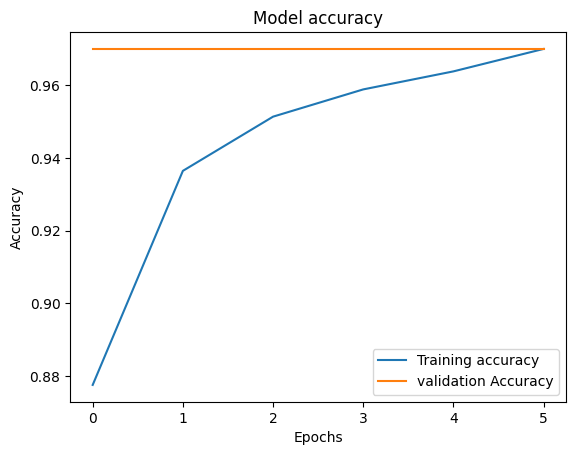

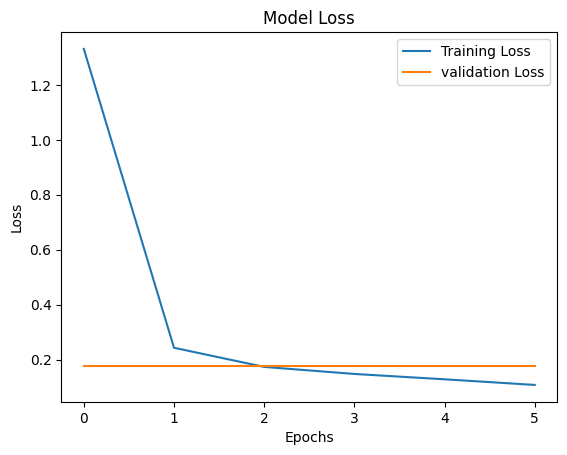

In [116]:
results = model.evaluate(x_validation, y_validation)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot([results[1] for a in range(6)], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history["loss"], label="Training Loss")
plt.plot([results[0] for a in range(6)], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
4       2       9       4       7       

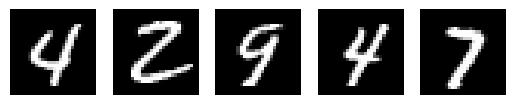

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
7


In [117]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0],n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    img = x_test[ind].reshape(1, -1)
    digit = np.argmax(model.predict(img))
    print(digit)

Q2) “Using a Convolutional Neural Network (CNN), access the Iris dataset from the following link (https://www.kaggle.com/datasets/uciml/iris/data
) and build a model to classify the samples into the three species: Iris-setosa, Iris-versicolor, and Iris-virginica. Evaluate the model’s performance and report accuracy, confusion matrix, and classification metrics.”

In [107]:

datas = pd.read_csv("Iris.csv").drop(columns = ["Id"])
x = datas.drop(columns = ["Species"]).to_numpy()

y = datas["Species"].to_numpy()
y = np.array([{"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}[a] for a in y])

X = X.astype("float32")
X = (X - X.mean(axis=0)) / X.std(axis=0)

X = X.reshape(X.shape[0], X.shape[1], 1)

y = keras.utils.to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Conv1D(16, kernel_size=2, activation="relu", input_shape=(4,1)),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(3, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=0)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", acc)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=iris.target_names))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

